> ** Info** : The Enron fraud is a big, messy and totally fascinating story about corporate malfeasance of nearly every imaginable type.
We’ve combined the email and finance data into a single dataset.
    

In [1]:
#!/usr/bin/python

""" 
    Starter code for exploring the Enron dataset (emails + finances);
    loads up the dataset (pickled dict of dicts).

    The dataset has the form:
    enron_data["LASTNAME FIRSTNAME MIDDLEINITIAL"] = { features_dict }

    {features_dict} is a dictionary of features associated with that person.
    You should explore features_dict as part of the mini-project,
    but here's an example to get you started:

    enron_data["SKILLING JEFFREY K"]["bonus"] = 5600000
    
"""

import pickle

enron_data = pickle.load(open("C:/Users/Jon Targaryen/Desktop/mach learn/ud120-projects/final_project/final_project_dataset.pkl", "r"))

> **Info**:  The aggregated Enron email + financial dataset is stored in a dictionary, where each key in the dictionary is a 
person’s name and the value is a dictionary containing all the features of that person.The email + finance (E+F) data dictionary
is stored as a pickle file,which is a handy way to store and load python objects directly. 
Use datasets_questions/explore_enron_data.py to load the dataset.



In [32]:
# How many data points (people) are in the dataset?

print len(enron_data)


146


In [34]:
# For each person, how many features are available?
# features in data set

import pprint
features = {}
for key, value in enron_data.iteritems():
    features[key] = len(value)

pprint.pprint (features)

{'ALLEN PHILLIP K': 21,
 'BADUM JAMES P': 21,
 'BANNANTINE JAMES M': 21,
 'BAXTER JOHN C': 21,
 'BAY FRANKLIN R': 21,
 'BAZELIDES PHILIP J': 21,
 'BECK SALLY W': 21,
 'BELDEN TIMOTHY N': 21,
 'BELFER ROBERT': 21,
 'BERBERIAN DAVID': 21,
 'BERGSIEKER RICHARD P': 21,
 'BHATNAGAR SANJAY': 21,
 'BIBI PHILIPPE A': 21,
 'BLACHMAN JEREMY M': 21,
 'BLAKE JR. NORMAN P': 21,
 'BOWEN JR RAYMOND M': 21,
 'BROWN MICHAEL': 21,
 'BUCHANAN HAROLD G': 21,
 'BUTTS ROBERT H': 21,
 'BUY RICHARD B': 21,
 'CALGER CHRISTOPHER F': 21,
 'CARTER REBECCA C': 21,
 'CAUSEY RICHARD A': 21,
 'CHAN RONNIE': 21,
 'CHRISTODOULOU DIOMEDES': 21,
 'CLINE KENNETH W': 21,
 'COLWELL WESLEY': 21,
 'CORDES WILLIAM R': 21,
 'COX DAVID': 21,
 'CUMBERLAND MICHAEL S': 21,
 'DEFFNER JOSEPH M': 21,
 'DELAINEY DAVID W': 21,
 'DERRICK JR. JAMES V': 21,
 'DETMERING TIMOTHY J': 21,
 'DIETRICH JANET R': 21,
 'DIMICHELE RICHARD G': 21,
 'DODSON KEITH': 21,
 'DONAHUE JR JEFFREY M': 21,
 'DUNCAN JOHN H': 21,
 'DURAN WILLIAM D': 21,
 'ECHOLS

> **Info**:   The “poi” feature records whether the person is a person of interest, according to our definition. 


In [30]:
# How many POIs are there in the E+F dataset?

counter = 0
for i in enron_data.values():
    if i['poi'] == True:
        counter+=1
print " # POI is %d " %counter   

 # POI is 18 


> **Info**: We compiled a list of all POI names (in ../final_project/poi_names.txt) and associated email addresses (in ../final_project/poi_email_addresses.py).


In [35]:
# How many POI’s were there total? 
# (Use the names file, not the email addresses, since many folks have more than one address and a few didn’t work for Enron, 
# so we don’t have their emails.)

poi_name_record = open("C:/Users/Jon Targaryen/Desktop/mach learn/ud120-projects/final_project/poi_names.txt").read().split("\n")

poi_name_total = [record for record in poi_name_record if "(y)" in record or "(n)" in record]

print("Total number of POIs: ", len(poi_name_total))

('Total number of POIs: ', 35)


As you can see, we have many of the POIs in our E+F dataset, but not all of them. Why is that a potential problem?

Main thought is about having enough data to really learn the patterns.  In general, more data is always better--only having 18 data points doesn't give you that many examples to learn from.

In [36]:
# What is the total value of the stock belonging to James Prentice?

enron_data["PRENTICE JAMES"]["total_stock_value"]

1095040

In [37]:
# How many email messages do we have from Wesley Colwell to persons of interest?
enron_data["COLWELL WESLEY"]["from_this_person_to_poi"]


11

In [38]:
# What’s the value of stock options exercised by Jeffrey K Skilling?

enron_data["SKILLING JEFFREY K"]["exercised_stock_options"]

19250000

Some of the schemes the Enron was involved in were : 

-Selling assets to shell companies at the end of each month, and buying them back at the beginning of the next month to hide accounting losses.

-Causing electrical grid failures in California.

-A plan in collaboration with Blockbuster movies to stream movies over the internet.

CEO at that time : Jeffrey Skillings.

Chairman of the Enron board of directors : Ken Lay.

CFO (chief financial officer) of Enron : Andrew Fastow.

In [40]:
# Of these three individuals (Lay, Skilling and Fastow), who took home the most money
# (largest value of “total_payments” feature)?
# How much money did that person get?

mykeys = ["SKILLING JEFFREY K","LAY KENNETH L","FASTOW ANDREW S"]
tot_value =list()
for key, value in enron_data.iteritems():
    if key in mykeys:
        tot_value = tot_value + [key,value["total_payments"]]
print tot_value

['LAY KENNETH L', 103559793, 'FASTOW ANDREW S', 2424083, 'SKILLING JEFFREY K', 8682716]


In [41]:
# How many folks in this dataset have a quantified salary? What about a known email address?

count = 0
for key, value in enron_data.iteritems():
    if value["salary"]!='NaN':
        count += 1
print "people who have a quantified salary: " + str(count)

count1 = 0
for key, value in enron_data.iteritems():
    if value["email_address"]!='NaN':
        count1+= 1
print "people who have an email address: " + str(count1)


people who have a quantified salary: 95
people who have an email address: 111


95 have a quantified salary. 111 have a known email address.

> **INFO**: A python dictionary can’t be read directly into an sklearn classification or regression algorithm; instead, it needs a numpy array or a list of lists (each element of the list (itself a list) is a data point, and the elements of the smaller list are the features of that point).
We’ve written some helper functions (featureFormat() and targetFeatureSplit() in tools/feature_format.py) that can take a list of feature names and the data dictionary, and return a numpy array.
In the case when a feature does not have a value for a particular person, this function will also replace the feature value with 0 (zero).

As you saw a little while ago, not every POI has an entry in the dataset (e.g. Michael Krautz). That’s because the dataset was created using the financial data you can find in final_project/enron61702insiderpay.pdf, which is missing some POI’s (those absences propagated through to the final dataset). On the other hand, for many of these “missing” POI’s, we do have emails.

While it would be straightforward to add these POI’s and their email information to the E+F dataset, and just put “NaN” for their financial information, this could introduce a subtle problem. I will walk through that here.


In [42]:
# How many people in the E+F dataset (as it currently exists) have “NaN” for their total payments? 
# What percentage of people in the dataset as a whole is this?

count2 = 0
for key, value in enron_data.iteritems():
    if value["total_payments"]=='NaN':
        count2 += 1
print "people in set with no number of their payments: " + str(count2)

print "percentage of people in the set with payment value missing: " + str(float(count2)/len(enron_data)*100)

people in set with no number of their payments: 21
percentage of people in the set with payment value missing: 14.3835616438


 21 out of 146 (about 14%) of the people in the dataset don't have "total_payments" filled in.

In [43]:
# How many POIs in the E+F dataset have “NaN” for their total payments? 
# What percentage of POI’s as a whole is this?


# number of pois

counter = 0
for i in enron_data.values():
    if i['poi'] == True:
        counter+=1
print "POI is %d " %counter  


# pois with 'NaN' payments
count3 = 0
for key, value in enron_data.iteritems():
    if value["poi"]=='True':
        if value["total_payments"]=='NaN':
            count3 += 1
print "POI people in set with no number of their payments: " + str(count3)

print "Percentage of POI people in the set with payment value missing: " + str(float(count3)/len(enron_data)*100)

POI is 18 
POI people in set with no number of their payments: 0
Percentage of POI people in the set with payment value missing: 0.0


0 out of 18, or 0% of POI's don't have total_payments filled.

If a machine learning algorithm were to use "total_payments" as a feature, 
would you expect it to associate a “NaN” value with POIs or non-POIs?

No training points would have "NaN" for total_payments when the class label is "POI".
The "NaN" would be associated with non-POIs.

If you added in, say, 10 more data points which were all POI’s, and put “NaN” for the total payments for those folks, 
the numbers you just calculated would change.
What is the new number of people of the dataset? What is the new number of folks with “NaN” for total payments?


New number of people of the dataset = 146 + 10 = 156.

People in set with no number of their payments =  21 + 10 = 31.


Now there are 156 folks in dataset, 31 of whom have "NaN" total_payments. 

This makes for 31/156 = 19.87 % of them with a "NaN" overall.


What is the new number of POI’s in the dataset? What is the new number of POI’s with NaN for total_payments?

New number of POI's in the data set = 18 + 10 = 28.

New number of POI’s with NaN for total_payments = 0 + 10 = 10.

POI + 'NaN' payment values = 10/28 = 35.71 % .


That's 36% of the POI's who have "NaN" for total_payments, a big jump from before.

Once the new data points are added, do you think a supervised classification algorithm might interpret “NaN” for total_payments as a clue that someone is a POI?

Yes, it totally could.


Adding in the new POI’s in this example, none of whom we have financial information for, has introduced a subtle problem, that our lack of financial information about them can be picked up by an algorithm as a clue that they’re POIs. Another way to think about this is that there’s now a difference in how we generated the data for our two classes--non-POIs all come from the financial spreadsheet, while many POIs get added in by hand afterwards. That difference can trick us into thinking we have better performance than we do--suppose you use your POI detector to decide whether a new, unseen person is a POI, and that person isn’t on the spreadsheet. Then all their financial data would contain “NaN” but the person is very likely not a POI (there are many more non-POIs than POIs in the world, and even at Enron)--you’d be likely to accidentally identify them as a POI, though!

For now, the takeaway message is to be very careful about introducing features that come from different sources depending on the class! It’s a classic way to accidentally introduce biases and mistakes.

> **INFO**:  Run the starter code found in regression/finance_regression.py. This will draw a scatterplot, with all the data points drawn in. What target are you trying to predict? What is the input feature being used to predict it?
Mentally (or better yet, print out the scatterplot and use paper and pencil) sketch out the regression line that you roughly predict.

reg coeff [ 5.44814029]
reg intercept -102360.543294


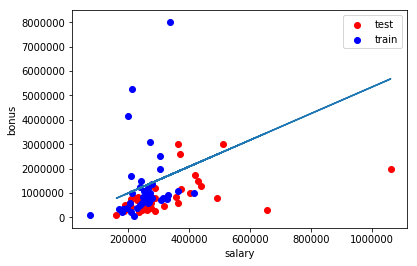

In [58]:
#!/usr/bin/python

"""
    Starter code for the regression mini-project.
    
    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).
    Draws a little scatterplot of the training/testing data
    You fill in the regression code where indicated:
"""    


import sys
import pickle
sys.path.append("C:\\Users\\Jon Targaryen\\Desktop\\mach learn\\ud120-projects\\tools")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("C:\\Users\\Jon Targaryen\\Desktop\\mach learn\\ud120-projects\\final_project\\final_project_dataset_modified.pkl", "r") )


### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.



from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(feature_train,target_train)
reg

print "reg coeff " + str(reg.coef_)
print "reg intercept " + str(reg.intercept_)





### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

The regression target is 'bonus.'
The input being used to find the regression target is 'salary.'

Training is the 'blue' dots.
Testing is the 'red' dots.

Regression line is drawn.

The regression line coefficient is : 5.44

The regression line y-intercept is : -102360.54 

In [59]:
# regression score on test :

print "score on test data: " + str(reg.score(feature_test,target_test))


score on test data: -1.48499241737


This is a very bad score.

There are lots of finance features available, some of which might be more powerful than others in terms of predicting a person’s bonus. For example, suppose you thought about the data a bit and guess that the “long_term_incentive” feature, which is supposed to reward employees for contributing to the long-term health of the company, might be more closely related to a person’s bonus than their salary is.

A way to confirm that you’re right in this hypothesis is to regress the bonus against the long term incentive, and see if the regression score is significantly higher than regressing the bonus against the salary. Perform the regression of bonus against long term incentive--what’s the score on the test data?

In [60]:
# bonus against long term incentive

import sys
import pickle
sys.path.append("C:\\Users\\Jon Targaryen\\Desktop\\mach learn\\ud120-projects\\tools")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("C:\\Users\\Jon Targaryen\\Desktop\\mach learn\\ud120-projects\\final_project\\final_project_dataset_modified.pkl", "r") )


### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "long_term_incentive"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(feature_train,target_train)
# reg

# print "reg coeff " + str(reg.coef_)
# print "reg intercept " + str(reg.intercept_)

print "score on test data " + str(reg.score(feature_test,target_test))


score on test data -0.59271289995


If you had to predict someone’s bonus and you could only have one piece of information about them, would you rather know their salary or the long term incentive that they received?

We have a better score when using long-term incentive to predict someone's bonus, which translates to a better fit.

> **INFO**: Go back to a setup where you are using the salary to predict the bonus, and rerun the code to remind yourself of what the data look like. You might notice a few data points that fall outside the main trend, someone who gets a high salary (over a million dollars!) but a relatively small bonus. This is an example of an outlier, and we’ll spend lots of time on them in the next lesson.
A point like this can have a big effect on a regression: if it falls in the training set, it can have a significant effect on the slope/intercept if it falls in the test set, it can make the score much lower than it would otherwise be As things stand right now, this point falls into the test set (and probably hurting the score on our test data as a result). Let’s add a little hack to see what happens if it falls in the training set instead. Add these two lines near the bottom of finance_regression.py, right before plt.xlabel(features_list[1]):

reg.fit(feature_test, target_test)

plt.plot(feature_train, reg.predict(feature_train), color="b") 

reg coeff [ 2.27410114]


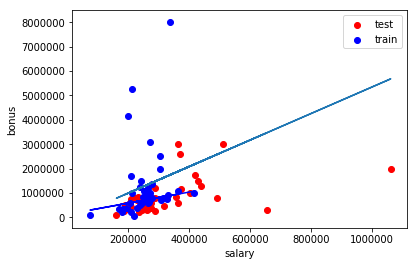

In [65]:
# OUTLIER

import sys
import pickle
sys.path.append("C:\\Users\\Jon Targaryen\\Desktop\\mach learn\\ud120-projects\\tools")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("C:\\Users\\Jon Targaryen\\Desktop\\mach learn\\ud120-projects\\final_project\\final_project_dataset_modified.pkl", "r") )


### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.







### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass

reg.fit(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="b")

print "reg coeff " + str(reg.coef_)
# print "reg intercept " + str(reg.intercept_)

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

Now we’ll be drawing two regression lines, one fit on the test data (with outlier) and one fit on the training data (no outlier). Look at the plot now--big difference, huh? That single outlier is driving most of the difference. 

What’s the slope of the new regression line?

The slope is about 2.27 after removing the outlier, which is a big difference from what we had before (about 5.4).  A small number of outliers makes a big difference!

